In [1]:
## Import basic required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## download the telco customer churn dataset from kaggle and readf it

In [3]:
## Read the dataset
df = pd.read_csv("Telco-Customer-Churn.csv")

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df['TotalCharges'] = df['TotalCharges'].str.replace(r'\.\d+$', '')

<ipython-input-6-5049a7b388a9>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['TotalCharges'] = df['TotalCharges'].str.replace(r'\.\d+$', '')


In [7]:
# if df['TotalCharges'].str.isnumeric().all():
#   # Convert to integers without errors
#   df['TotalCharges'] = df['TotalCharges'].astype(int)
# else:
  # Handle errors: Replace non-numeric with NaN or raise error
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [8]:
df['TotalCharges']

0         29.0
1       1889.0
2        108.0
3       1840.0
4        151.0
         ...  
7038    1990.0
7039    7362.0
7040     346.0
7041     306.0
7042    6844.0
Name: TotalCharges, Length: 7043, dtype: float64

In [9]:
## Checking for null values

df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
## Checking for duplicates
df.duplicated().sum()

0

In [11]:
# Find the total number of male customers
# df.loc[df['gender'] == 'Male'].value_counts().sum()

sum(df['gender'] == 'Male')

3555

In [12]:
# Find the total number of customers whose Internet Service is ‘DSL’
sum(df['InternetService'] == 'DSL')

2421

In [13]:
# Extract all the Female senior citizens whose Payment Method is Mailed check & store the
# result in ‘new_customer’

new_customer = df[(df['gender'] == 'Female') & (df['SeniorCitizen'] == 1) & (df['PaymentMethod'] == 'Mailed check')]

In [14]:
new_customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
139,0390-DCFDQ,Female,1,Yes,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.45,70.0,Yes
176,2656-FMOKZ,Female,1,No,No,15,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.45,1145.0,Yes
267,3197-ARFOY,Female,1,No,No,19,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,105.00,2007.0,No
451,5760-WRAHC,Female,1,No,No,22,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Month-to-month,Yes,Mailed check,69.75,1545.0,No
470,4933-IKULF,Female,1,No,No,17,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,330.0,No


In [15]:
# Extract all those customers whose tenure is less than 10 months or their Total charges is less
# than 500$ & store the result in ‘new_customer’

new_customer = df[(df['tenure'] < 10) | (df['TotalCharges'] < 500)]

In [16]:
new_customer

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.0,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.0,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.0,Yes
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7029,2235-DWLJU,Female,1,No,No,6,No,No phone service,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.0,No
7030,0871-OPBXW,Female,0,No,No,2,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.05,39.0,No
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.0,Yes
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.0,No


In [16]:
# Build a pie-chart to show the distribution of customers would be churning out
names = df['Churn'].value_counts().keys().tolist()

In [17]:
sizes = df['Churn'].value_counts().tolist()

([<matplotlib.patches.Wedge at 0x7bb696b82320>,
 [Text(-0.7393678277834757, 0.8144539368428056, 'No'),
  Text(0.7393677515287918, -0.8144540060674139, 'Yes')],
 [Text(-0.4032915424273503, 0.44424760191425755, '73.5%'),
  Text(0.4032915008338864, -0.4442476396731348, '26.5%')])

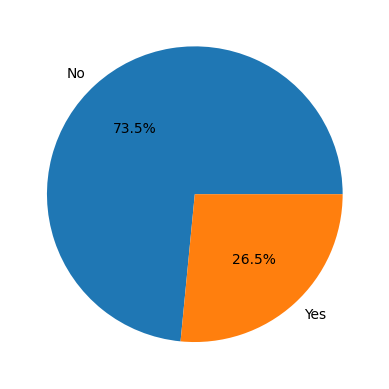

In [18]:
plt.pie(sizes, labels = names, autopct= "%0.1f%%")

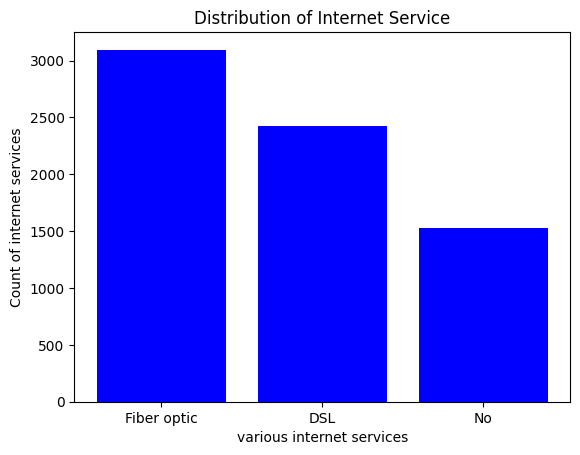

In [19]:
# Build a bar-plot to show the distribution of ‘Internet Service’

plt.bar(df["InternetService"].value_counts().keys().tolist(), df["InternetService"].value_counts().tolist(),
        color = 'blue')

plt.xlabel("various internet services")
plt.ylabel("Count of internet services")
plt.title("Distribution of Internet Service")
plt.show()

In [20]:
# label encoding
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

In [21]:
# df['Churn'] = le.fit_transform(df['Churn'])

Model Building:

In [23]:
# using ‘tenure’ as the feature and ‘Churn’ as the dependent/target column:
x = df[['tenure']]
y = df['Churn'].map({'Yes': 1, 'No': 0})

In [24]:
x.shape, y.shape

((7043, 1), (7043,))

In [17]:
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state= 42)

In [27]:
x_train.shape, y_train.shape

((5282, 1), (5282,))

In [ ]:
x_test.shape, y_test.shape

((2113,), (2113,))

In [44]:
del model

In [18]:
# Build a sequential model using Keras, to find out if the customerwouldchurn or not

import tensorflow as tf


In [19]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.utils import to_categorical

In [30]:
model = Sequential()

In [ ]:
# i.
# ii.
# iii.
# iv.
# v. Predict the values on the test set and build a confusion matrix
# vi. Plot the ‘Accuracy vs Epochs’ graph


In [31]:
# The visible/input layer should have 12 nodes with ‘Relu’ as activation function.

model.add(Dense(12, input_dim=1, activation='relu'))


# This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function

model.add(Dense(8, activation = 'relu'))

# Output layer

model.add(Dense(1, activation = 'sigmoid'))

In [32]:
# Use ‘Adam’ as the optimization algorithm
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = ["acc"])

In [33]:
# Fit the model on the train set, with number of epochs to be 150

model.fit(x_train, y_train, epochs=150,validation_data=(x_test,y_test))

Epoch 1/150
166/166 [==============================] - 1s 3ms/step - loss: 0.5159 - acc: 0.7355 - val_loss: 0.5093 - val_acc: 0.7263
Epoch 2/150
166/166 [==============================] - 0s 3ms/step - loss: 0.5132 - acc: 0.7365 - val_loss: 0.5093 - val_acc: 0.7280
Epoch 3/150
166/166 [==============================] - 0s 2ms/step - loss: 0.5122 - acc: 0.7368 - val_loss: 0.5116 - val_acc: 0.7280
Epoch 4/150
166/166 [==============================] - 0s 3ms/step - loss: 0.5130 - acc: 0.7368 - val_loss: 0.5101 - val_acc: 0.7280
Epoch 5/150
166/166 [==============================] - 0s 2ms/step - loss: 0.5139 - acc: 0.7406 - val_loss: 0.5096 - val_acc: 0.7280
Epoch 6/150
166/166 [==============================] - 0s 2ms/step - loss: 0.5136 - acc: 0.7384 - val_loss: 0.5121 - val_acc: 0.7280
Epoch 7/150
166/166 [==============================] - 0s 2ms/step - loss: 0.5112 - acc: 0.7368 - val_loss: 0.5093 - val_acc: 0.7280
Epoch 8/150
166/166 [==============================] - 1s 4ms/step - 

In [34]:
np.mean(model.history.history['val_acc'])

0.7459928039709727

In [35]:
y_pred=model.predict(x_test)

56/56 [==============================] - 0s 2ms/step


In [20]:
from sklearn.metrics import confusion_matrix

In [38]:
# If y_pred contains probabilities:
y_pred_labels = np.where(y_pred > 0.5, 1, 0)

In [39]:
confusion_matrix(y_test, y_pred_labels)

array([[1163,  119],
       [ 318,  161]])

In [46]:
# the 2nd model using same target and feature variables:

model = Sequential()

In [43]:
from keras.layers import Dropout

In [47]:
# Add a drop-out layer after the input layer with drop-out value of 0.3

model.add(Dense(12, input_dim=1, activation='relu'))

model.add(Dropout(0.3))

# Add a drop-out layer after the hidden layer with drop-out value of 0.2

model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(1, activation='sigmoid'))

In [48]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [49]:
model.fit(x_train, y_train, epochs=150,validation_data=(x_test,y_test))

Epoch 1/150
166/166 [==============================] - 2s 4ms/step - loss: 1.1442 - acc: 0.6172 - val_loss: 0.5362 - val_acc: 0.7280
Epoch 2/150
166/166 [==============================] - 0s 3ms/step - loss: 0.6830 - acc: 0.7024 - val_loss: 0.5255 - val_acc: 0.7280
Epoch 3/150
166/166 [==============================] - 0s 3ms/step - loss: 0.6320 - acc: 0.7111 - val_loss: 0.5250 - val_acc: 0.7280
Epoch 4/150
166/166 [==============================] - 0s 3ms/step - loss: 0.5844 - acc: 0.7164 - val_loss: 0.5327 - val_acc: 0.7280
Epoch 5/150
166/166 [==============================] - 1s 4ms/step - loss: 0.5695 - acc: 0.7181 - val_loss: 0.5297 - val_acc: 0.7280
Epoch 6/150
166/166 [==============================] - 1s 4ms/step - loss: 0.5676 - acc: 0.7117 - val_loss: 0.5320 - val_acc: 0.7280
Epoch 7/150
166/166 [==============================] - 1s 4ms/step - loss: 0.5595 - acc: 0.7242 - val_loss: 0.5310 - val_acc: 0.7280
Epoch 8/150
166/166 [==============================] - 1s 4ms/step - 

In [51]:
# Predict the values on the test set and build a confusion matrix
y_pred = model.predict(x_test)

56/56 [==============================] - 0s 3ms/step


In [53]:
y_pred_labels = np.where(y_pred > 0.5, 1, 0)

In [55]:
confusion_matrix(y_test,y_pred_labels)

array([[1282,    0],
       [ 479,    0]])

In [ ]:
# Plot the ‘Accuracy vs Epochs’ graph
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.legend()
plt.show()

In [21]:
#  the 3rd model using ‘Tenure’, ’Monthly Charges’ & ‘Total Charges’ as the features and
# ‘Churn’ as the dependent/target column:
x = df[['MonthlyCharges', 'tenure', 'TotalCharges']]
y = df['Churn'].map({'Yes': 1, 'No': 0})

In [22]:
x.shape, y.shape

((7043, 3), (7043,))

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state= 42)

In [24]:
x_train.shape, y_train.shape

((4930, 3), (4930,))

In [25]:
model = Sequential()

In [26]:
model.add(Dense(12, input_dim=3, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [27]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [28]:
model.fit(x_train, y_train, epochs=150,validation_data=(x_test,y_test))

Epoch 1/150
155/155 [==============================] - 2s 5ms/step - loss: nan - accuracy: 0.7335 - val_loss: nan - val_accuracy: 0.7283
Epoch 2/150
155/155 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.7373 - val_loss: nan - val_accuracy: 0.7283
Epoch 3/150
155/155 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.7373 - val_loss: nan - val_accuracy: 0.7283
Epoch 4/150
155/155 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.7373 - val_loss: nan - val_accuracy: 0.7283
Epoch 5/150
155/155 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.7373 - val_loss: nan - val_accuracy: 0.7283
Epoch 6/150
155/155 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.7373 - val_loss: nan - val_accuracy: 0.7283
Epoch 7/150
155/155 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7373 - val_loss: nan - val_accuracy: 0.7283
Epoch 8/150
155/155 [====================

In [ ]:
# Predict the values on the test set and build a confusion matrix
y_pred = model.predict_classes(x_test)
confusion_matrix(y_test,y_pred)

In [ ]:
# Plot the ‘Accuracy vs Epochs’ graph

plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.legend()
plt.show()
